In [1]:
import numpy as np
from scipy.misc import imread, imsave
import matplotlib.pyplot as plt
import scipy.linalg as la

#plt.style.use('ggplot')

# Problem 1

In [2]:
'''
y(-1) = 1
y(1) = 7
u_t = -1 - y'^2 + y*y", x in (a,b)
u(x,0) = g(x)
u(a,t) = y_a, u(b,t) = y_b
'''
a, b = -1, 1
X = np.linspace(a, b, 21)
dx = X[1] - X[0]
T = np.linspace(0,.2,251)
dt = T[1] - T[0]
stability_condition = (dt)/((dx)**2)
print('Stability Condition: {:.2f} <= .5, {}'.format(stability_condition, stability_condition<=.5))

Stability Condition: 0.08 <= .5, True


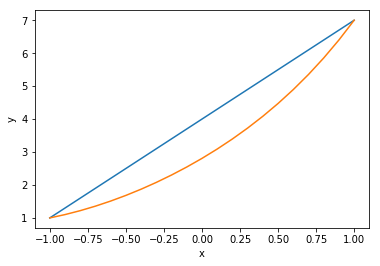

In [3]:
y0 = (lambda x: 4 + x*3)(X)
y1 = y0.copy()
y2 = y0.copy()
yp = (np.roll(y2,-1) - np.roll(y2,1))[1:-1]/(2*dx)
ypp = (np.roll(y2,-1) - 2*y2 + np.roll(y2,1))[1:-1]/(dx**2)
yt = -1 - yp**2 + y2[1:-1]*ypp

maxiter = len(T)

for i in range(maxiter):
    #print('y2: {}\ny1: {}\nyt: {}'.format(y2.shape,y1.shape,yt.shape))
    y2[1:-1] = y1[1:-1] + dt*yt
    if la.norm(y2-y1) < 1e-5:
        print("Coverged after {} iterations.".format(i))
        break
    yp = (np.roll(y2,-1) - np.roll(y2,1))[1:-1]/(2*dx)
    ypp = (np.roll(y2,-1) - 2*y2 + np.roll(y2,1))[1:-1]/(dx**2)
    yt = -1 - yp**2 + y2[1:-1]*ypp
    y1 = y2.copy()
    
plt.plot(X,y0)
plt.plot(X,y2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Problem 2

In [4]:
imagename = 'balloons_bw.jpg'
changed_pixels=40000
# Read the image file imagename into an array of numbers, IM
# Multiply by 1. / 255 to change the values so that they are floating point
# numbers ranging from 0 to 1.
IM = imread(imagename, flatten=True) * (1. / 255)
IM_x, IM_y = IM.shape

for lost in range(changed_pixels):
    x_,y_ = np.random.randint(1,IM_x-2), np.random.randint(1,IM_y-2)
    val = .1*np.random.randn() + .5
    IM[x_,y_] = max( min(val,1.), 0.)

C:\Users\matts\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


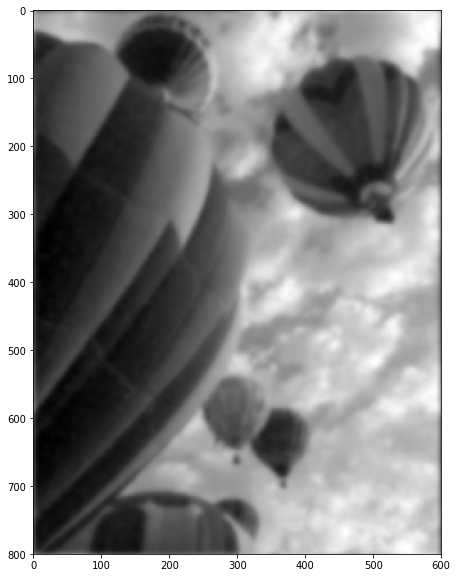

In [6]:
dt = 1e-3
lmbda = 40
dx = 1
dy = 1

u0 = IM.copy()
for t in range(250):
    uxx = np.roll(u0,-1,axis=1) - 2*u0 + np.roll(u0,1,axis=1)
    uxx = uxx/(dx**2)
    uyy = np.roll(u0,-1,axis=0) - 2*u0 + np.roll(u0,1,axis=0)
    uyy = uyy/(dy**2)
    ut = -(u0 - IM - lmbda*(uxx+uyy))
    u1 = u0 + dt*ut
    if la.norm(u0-u1) < 1e-5:
        print("Converged by iteration {}.".format(t))
        break
    u0 = u1.copy()
plt.figure(figsize=(12,10))
plt.imshow(u1, cmap='gray')
plt.show()

# Problem 3

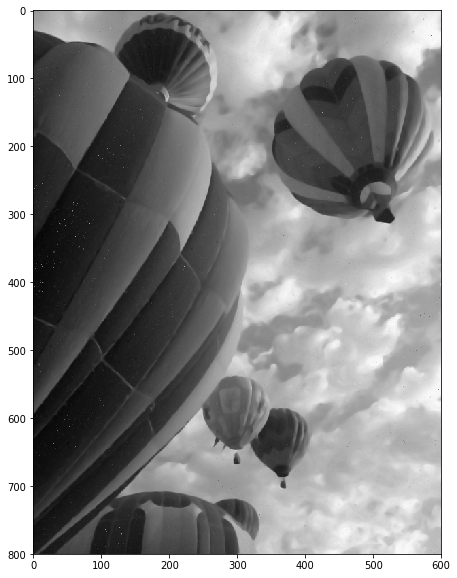

In [9]:
dt = 1e-3
lmbda = 1
dx = 1
dy = 1

eps = 1e-4

u0 = IM.copy()
for t in range(200):
    ux = (np.roll(u0,-1,axis=1) - np.roll(u0,1,axis=1))/2 
    uy = (np.roll(u0,-1,axis=0) - np.roll(u0,1,axis=0))/2 
    uxx = np.roll(u0,-1,axis=1) - 2*u0 + np.roll(u0,1,axis=1)
    uyy = np.roll(u0,-1,axis=0) - 2*u0 + np.roll(u0,1,axis=0) 
    uxy = (np.roll(ux,-1,axis=0) - np.roll(ux,1,axis=0))/2.
    ut = -lmbda*(u0 - IM) \
         + (uxx*uy**2 + uyy*ux**2 - 2*ux*uy*uxy)/((eps + ux**2 + uy**2)**(1.5))
    u1 = u0 + dt*ut
    u0 = u1.copy()
plt.figure(figsize=(12,10))
plt.imshow(u1, cmap='gray')
plt.show()

I set $\epsilon = 10^{-4}$ and it looks good, so I suppose that is a good size.